ДЗ 6. Metric model (regression)
Для датасету https://archive.ics.uci.edu/ml/datasets/Abalone побудувати метричну модель регресії
Таргет - вік (кількість кілець)
Додатково: класифікація, таргет - стать (infant, male, female)

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures

In [15]:
df = pd.read_csv('hw-6/abalone/abalone.data')
df.columns = ['Sex', 'Length', 'Diam', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell', 'Rings']
# Rings - is Target
df

,Sex,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [16]:
df.dtypes


Sex         object
Length     float64
Diam       float64
Height     float64
Whole      float64
Shucked    float64
Viscera    float64
Shell      float64
Rings        int64
dtype: object

In [17]:
# Визначаємо категоріальні і числові фічі
num_features = ['Length', 'Diam', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell']
cat_features = ['Sex']

In [18]:
# Виводимо target окремо 
X_reg = df.drop(['Rings'], axis=1)
y_reg = df['Rings']

In [29]:
# Енкодимо категоріальні фічі та масштабуємо числові
onehot_encoder = OneHotEncoder()
cat_encoded = onehot_encoder.fit_transform(X_reg[cat_features]).toarray()
cat_encoded_df = pd.DataFrame(cat_encoded, columns=onehot_encoder.get_feature_names_out(cat_features))
scaler = StandardScaler()
num_scaled = scaler.fit_transform(X_reg[num_features])
num_scaled_df = pd.DataFrame(num_scaled, columns=num_features)

# Об'єднання закодованих категоріальних і масштабованих числових колонок
X_reg = pd.concat([cat_encoded_df, num_scaled_df], axis=1)

# Виведення результату
X_reg

,Sex_F,Sex_I,Sex_M,Length,Diam,Height,Whole,Shucked,Viscera,Shell
0,0.0,0.0,1.0,-1.449007,-1.439892,-1.184252,-1.230344,-1.170967,-1.205327,-1.213054
1,1.0,0.0,0.0,0.049892,0.122015,-0.108247,-0.309601,-0.463610,-0.356844,-0.207277
2,0.0,0.0,1.0,-0.699558,-0.432210,-0.347360,-0.637928,-0.648334,-0.607739,-0.602404
3,0.0,1.0,0.0,-1.615552,-1.540661,-1.423364,-1.272150,-1.216022,-1.287438,-1.320816
4,0.0,1.0,0.0,-0.824466,-1.087204,-1.064696,-0.973393,-0.983991,-0.940746,-0.853848
...,...,...,...,...,...,...,...,...,...,...
4171,1.0,0.0,0.0,0.341344,0.424320,0.609089,0.118651,0.047759,0.532696,0.072904
4172,0.0,0.0,1.0,0.549524,0.323551,-0.108247,0.279756,0.358635,0.309170,0.155521
4173,0.0,0.0,1.0,0.632797,0.676240,1.565537,0.708009,0.748357,0.975184,0.496767
4174,1.0,0.0,0.0,0.840977,0.777008,0.250421,0.541806,0.773137,0.733412,0.410557


In [30]:
# Розподіл даних на тренувальну та тестову вибірки
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [37]:
# Побудова моделі регресії
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_model.predict(X_test_reg)

# Оцінка моделі регресії
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = mean_squared_error(y_test_reg, y_pred_reg)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 4.657540653994075
R^2 Score: 0.579391468567215
Mean Absolute Error: 1.5642816696439803
Root Mean Squared Error: 4.657540653994075


In [40]:
# Класифікація статі
X_clf = df.drop(['Sex', 'Rings'], axis=1)
y_clf = df['Sex']

# Кодування цільової змінної
y_clf = label_encoder.fit_transform(y_clf)

# Масштабуємо числові, оскільки вік ніяк не впливає на стать то ми робимо це для всіх
scaler = StandardScaler()
X_clf = scaler.fit_transform(X_clf)

# Розподіл даних на тренувальну та тестову вибірки
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Побудова моделі класифікації
clf_model = LogisticRegression(max_iter=10000)
clf_model.fit(X_train_clf, y_train_clf)
y_pred_clf = clf_model.predict(X_test_clf)

# Оцінка моделі класифікації
accuracy = accuracy_score(y_test_clf, y_pred_clf)
report = classification_report(y_test_clf, y_pred_clf, target_names=label_encoder.classes_)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.5550239234449761
Classification Report:
              precision    recall  f1-score   support

           F       0.45      0.36      0.40       252
           I       0.65      0.81      0.72       263
           M       0.52      0.50      0.51       321

    accuracy                           0.56       836
   macro avg       0.54      0.56      0.54       836
weighted avg       0.54      0.56      0.54       836



           Length      Diam    Height     Whole   Shucked   Viscera     Shell
Length   1.000000  0.986813  0.827552  0.925255  0.897905  0.903010  0.897697
Diam     0.986813  1.000000  0.833705  0.925452  0.893159  0.899726  0.905328
Height   0.827552  0.833705  1.000000  0.819209  0.774957  0.798293  0.817326
Whole    0.925255  0.925452  0.819209  1.000000  0.969403  0.966372  0.955351
Shucked  0.897905  0.893159  0.774957  0.969403  1.000000  0.931956  0.882606
Viscera  0.903010  0.899726  0.798293  0.966372  0.931956  1.000000  0.907647
Shell    0.897697  0.905328  0.817326  0.955351  0.882606  0.907647  1.000000


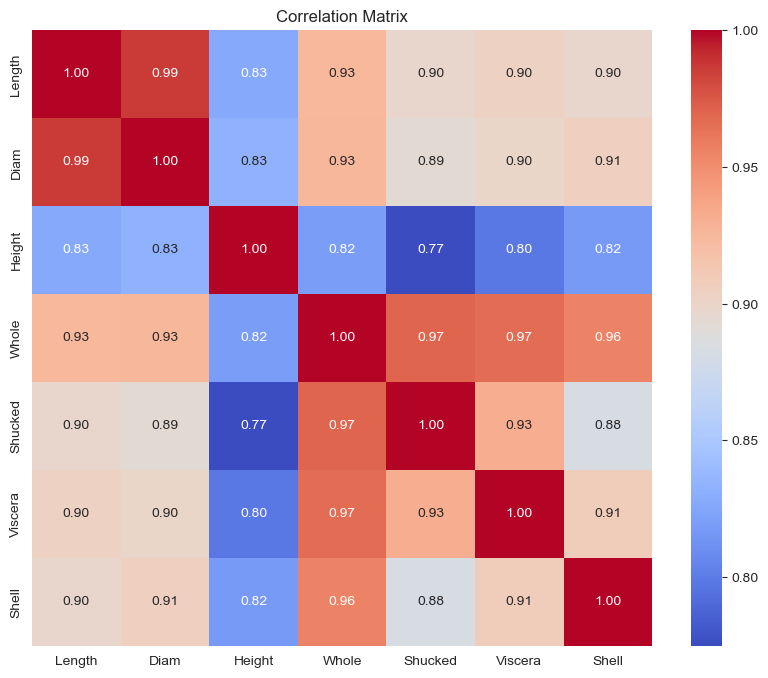

In [49]:
# Результати не дуже тому вирішив глянути на фічі ще раз 

# Compute the correlation matrix
corr_matrix = df[num_features].corr()
print(corr_matrix)
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

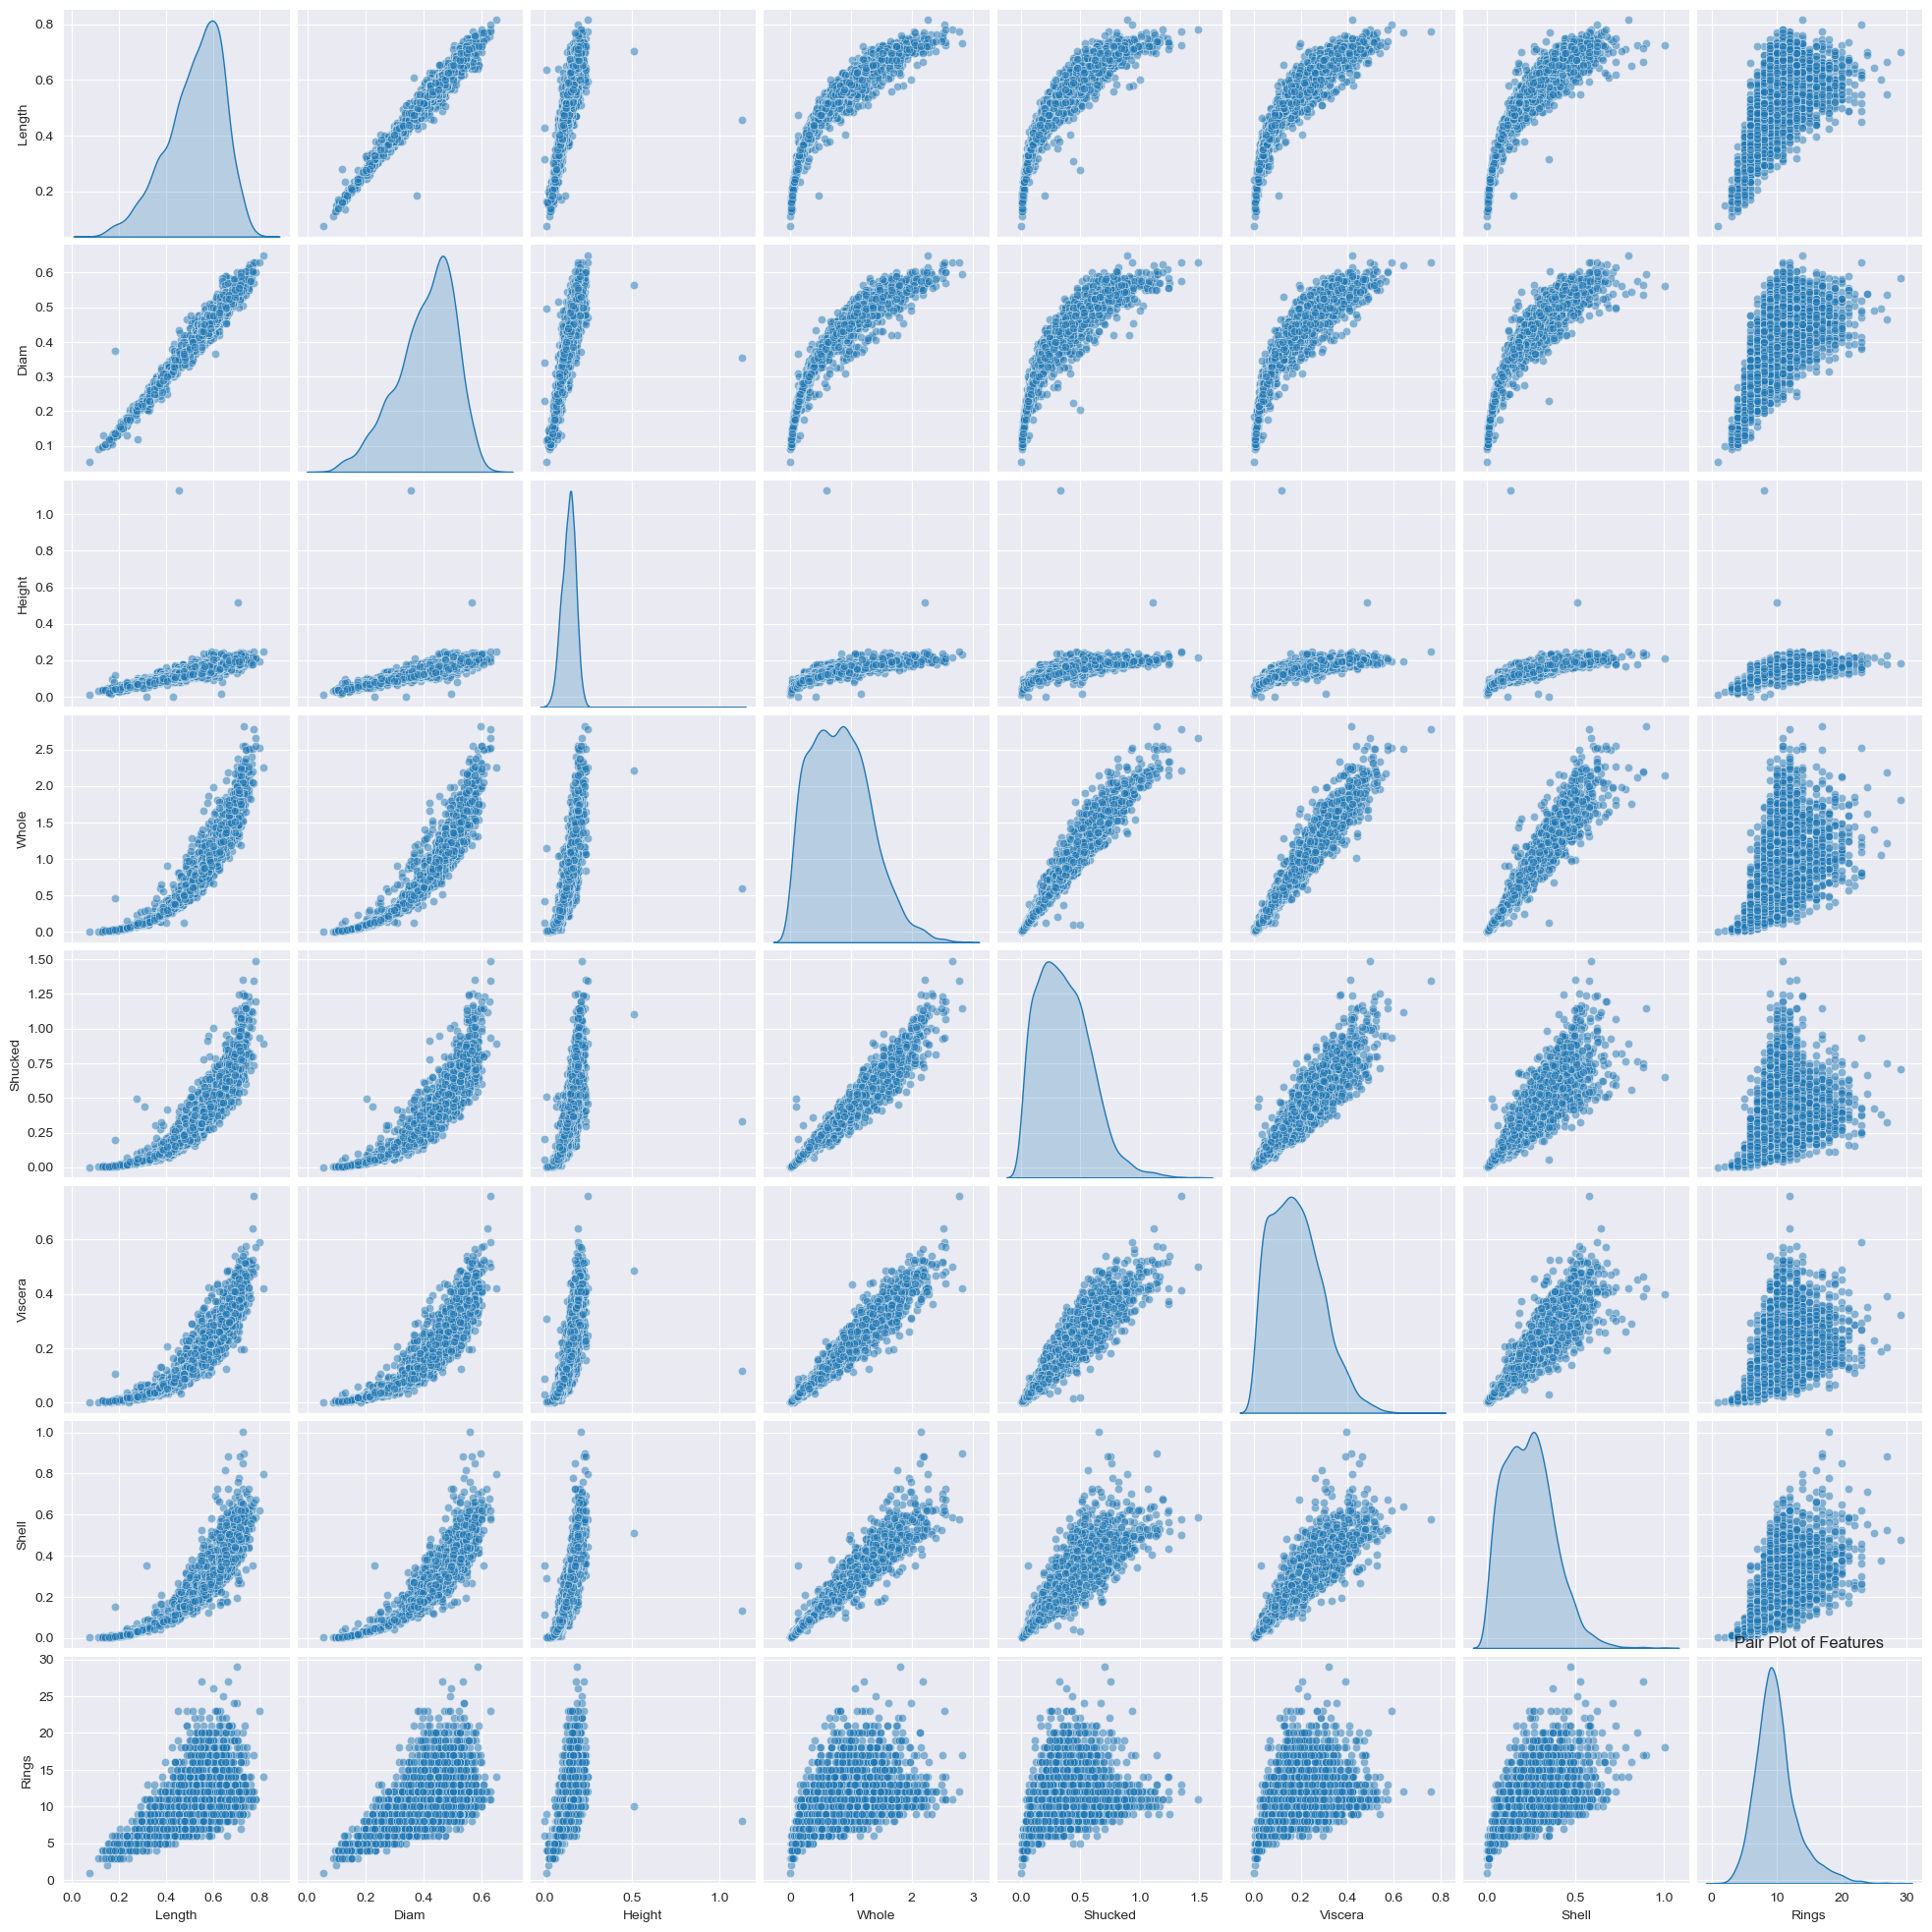

In [52]:
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha':0.5})
plt.title('Pair Plot of Features')
plt.show()

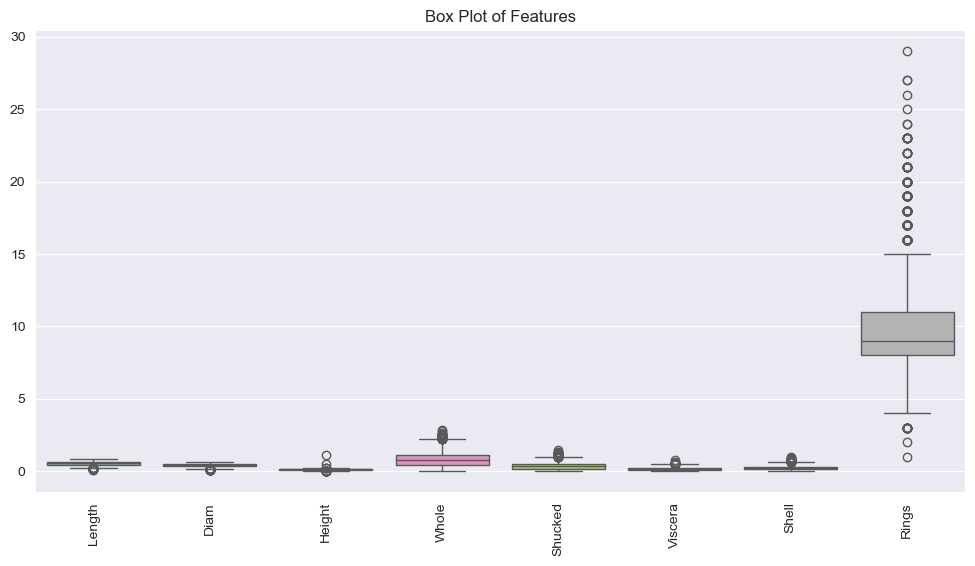

In [53]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, palette='Set2')
plt.title('Box Plot of Features')
plt.xticks(rotation=90)
plt.show()

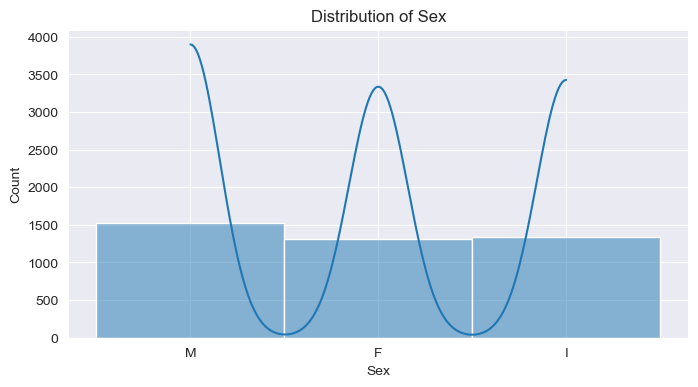

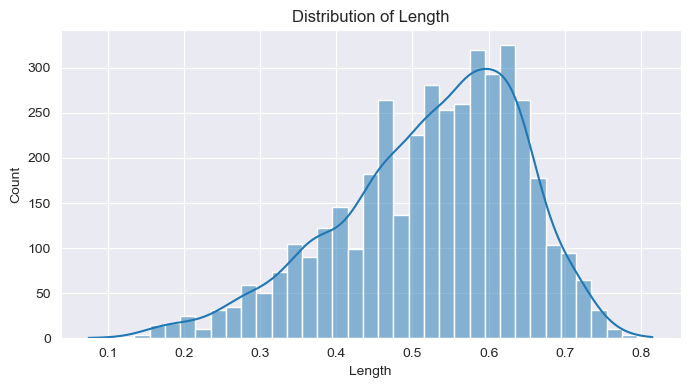

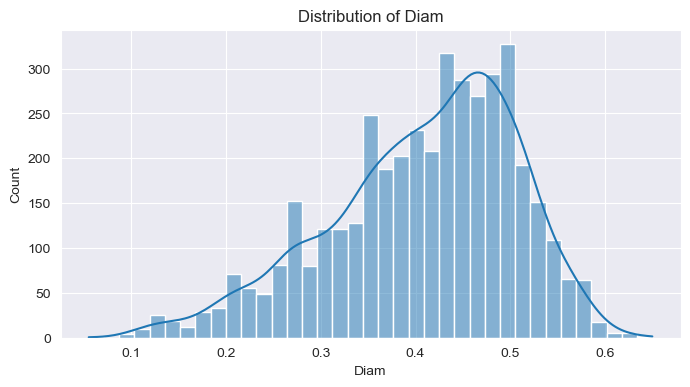

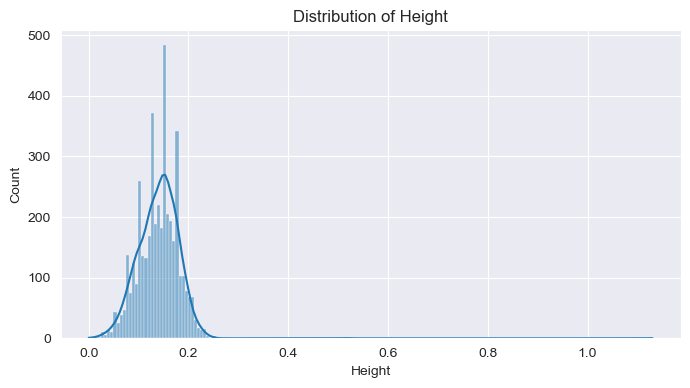

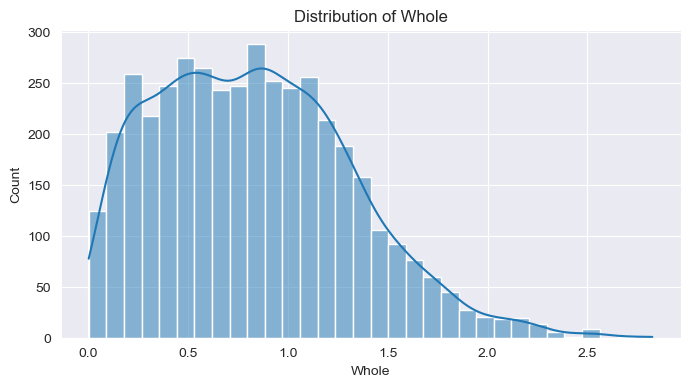

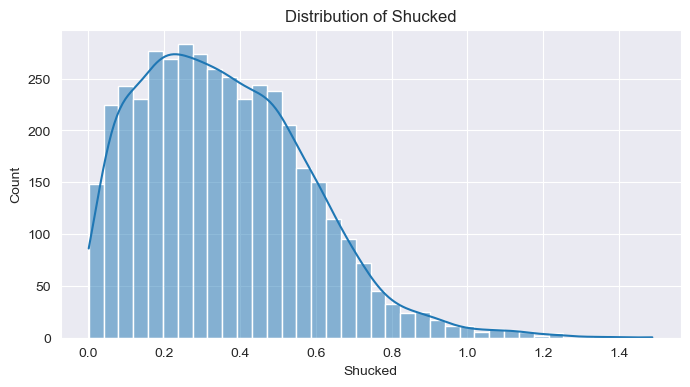

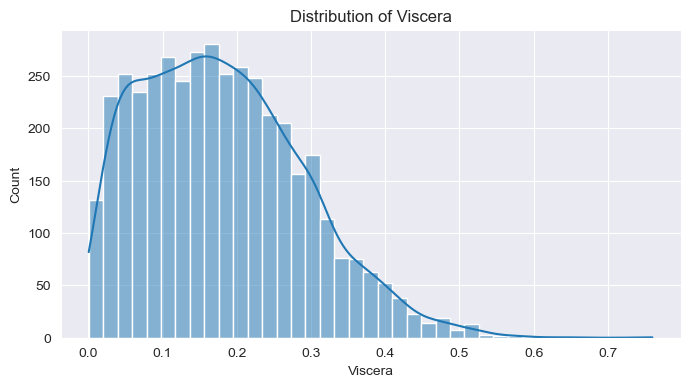

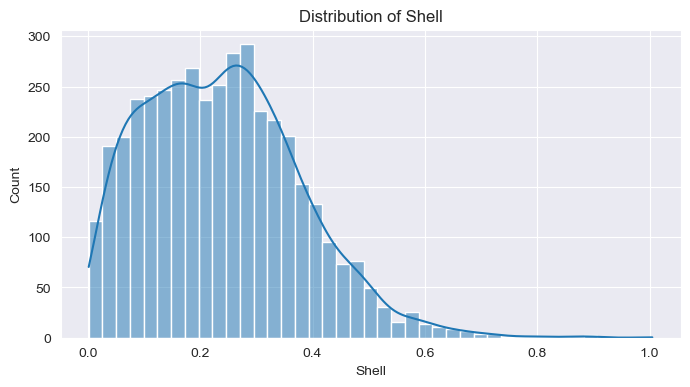

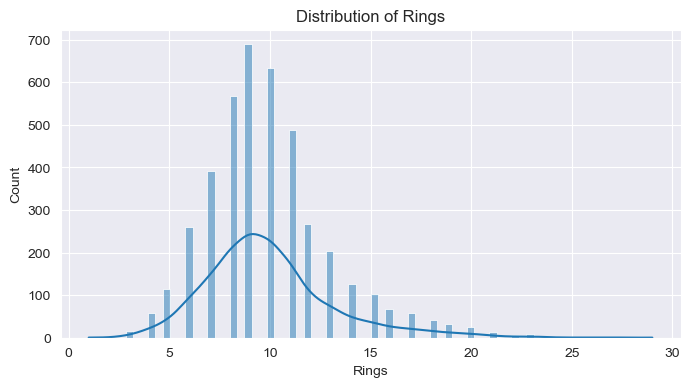

In [54]:
for column in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

In [59]:
# Проба побудови моделі з тюнінгом гіперпараметрів за допомогод GridSearchCv
# Define the ElasticNet model
elastic_net = ElasticNet()

# Define the hyperparameters grid
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],  # Regularization strength
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]   # Mix ratio between L1 and L2 penalty
}

# Setup the GridSearchCV
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5, scoring='r2')

# Fit the model
grid_search.fit(X_train_reg, y_train_reg)

# Best parameters found by GridSearchCV
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_reg = best_model.predict(X_test_reg)

# Evaluate the model
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = mean_squared_error(y_test_reg, y_pred_reg)

print("ElasticNet Regression with GridSearchCV:")
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

Best parameters found: {'alpha': 0.01, 'l1_ratio': 0.9}
ElasticNet Regression with GridSearchCV:
Mean Squared Error: 4.717529109174605
R^2 Score: 0.5739740910474361
Mean Absolute Error: 1.5715275432967206
Root Mean Squared Error: 4.717529109174605


In [60]:
# Результат трохи кращий але все ще не дуже 
# Перевіряю чи можуть Polynominal Features дати кращі результати
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_reg)
X_test_poly = poly.transform(X_test_reg)

reg_model_poly = LinearRegression()
reg_model_poly.fit(X_train_poly, y_train_reg)
y_pred_poly = reg_model_poly.predict(X_test_poly)

r2_poly = r2_score(y_test_reg, y_pred_poly)
print(f'R^2 Score with Polynomial Features: {r2_poly}')

R^2 Score with Polynomial Features: 0.6036009102449391


In [62]:
# Отже найбільший приріст дає використання Polynomial Features
# Загалом думаю результат можна покращити якщо подумати як вирішити питання залежних фіч типу висоти і ширини